# Debug

In [1]:
import matplotlib.pyplot as plt

import andes

In [2]:
!andes misc --version

Python  3.12.0
andes   1.9.3
numpy   2.1.2
kvxopt  1.3.2.1
sympy   1.13.3
scipy   1.13.1
pandas  2.2.3
numba   0.61.0


In [3]:
%matplotlib inline

In [4]:
andes.config_logger(stream_level=30)

In [5]:
s1 = andes.load("./ieee14_pll1.xlsx",
                setup=True, no_output=True, default_config=True)

s1.PQ.set(src='q0',attr='v', idx='PQ_3', value=0.0)

GENCLS: unused data {'xd': 1.8, 'xq': 1.75, 'xd2': 0.23, 'xq1': 0.8, 'xq2': 0.23, 'Td10': 6.5, 'Td20': 0.06, 'Tq10': 0.2, 'Tq20': 0.05}
GENCLS: unused data {'xd': 1.8, 'xq': 1.75, 'xd2': 0.28, 'xq1': 0.8, 'xq2': 0.28, 'Td10': 6.5, 'Td20': 0.06, 'Tq10': 0.2, 'Tq20': 0.05}
GENCLS: unused data {'xd': 1.8, 'xq': 1.75, 'xd2': 0.34, 'xq1': 0.8, 'xq2': 0.34, 'Td10': 6.5, 'Td20': 0.06, 'Tq10': 0.2, 'Tq20': 0.05}
GENCLS: unused data {'xd': 1.8, 'xq': 1.75, 'xd2': 0.28, 'xq1': 0.8, 'xq2': 0.28, 'Td10': 6.5, 'Td20': 0.06, 'Tq10': 0.2, 'Tq20': 0.05}
GENCLS: unused data {'xd': 1.8, 'xq': 1.75, 'xd2': 0.34, 'xq1': 0.8, 'xq2': 0.34, 'Td10': 6.5, 'Td20': 0.06, 'Tq10': 0.2, 'Tq20': 0.05}


True

In [6]:
s1.TurbineGov.models

OrderedDict([('TG2', TG2 (0 devices) at 0x11f785b20),
             ('TGOV1', TGOV1 (0 devices) at 0x11f7ae3c0),
             ('TGOV1DB', TGOV1DB (0 devices) at 0x11f7aecc0),
             ('TGOV1N', TGOV1N (0 devices) at 0x11f7d8290),
             ('TGOV1NDB', TGOV1NDB (0 devices) at 0x11f7d8e30),
             ('IEEEG1', IEEEG1 (0 devices) at 0x11f7da480),
             ('IEESGO', IEESGO (0 devices) at 0x11f808320),
             ('GAST', GAST (0 devices) at 0x11f809850),
             ('HYGOV', HYGOV (0 devices) at 0x11f80a810),
             ('HYGOVDB', HYGOVDB (0 devices) at 0x11f71bf50),
             ('HYGOV4', HYGOV4 (0 devices) at 0x11f840fb0)])

In [7]:
s1.Exciter.models

OrderedDict([('EXDC2', EXDC2 (0 devices) at 0x11f843230),
             ('IEEEX1', IEEEX1 (0 devices) at 0x11f860860),
             ('ESDC1A', ESDC1A (0 devices) at 0x11f862270),
             ('ESDC2A', ESDC2A (0 devices) at 0x11f888050),
             ('EXST1', EXST1 (0 devices) at 0x11f842a80),
             ('ESST3A', ESST3A (0 devices) at 0x11f88b0b0),
             ('SEXS', SEXS (0 devices) at 0x11f8bd400),
             ('IEEET1', IEEET1 (0 devices) at 0x11f8be240),
             ('EXAC1', EXAC1 (0 devices) at 0x11f842b40),
             ('EXAC2', EXAC2 (0 devices) at 0x11f8e53a0),
             ('EXAC4', EXAC4 (0 devices) at 0x11f8e77d0),
             ('ESST4B', ESST4B (0 devices) at 0x11f90caa0),
             ('AC8B', AC8B (0 devices) at 0x11f90ebd0),
             ('IEEET3', IEEET3 (0 devices) at 0x11f9489b0),
             ('ESAC1A', ESAC1A (0 devices) at 0x11f949fd0),
             ('ESST1A', ESST1A (0 devices) at 0x11f964050),
             ('ESAC5A', ESAC5A (0 devices) at 0x11f966f30)

In [8]:
s1.PQ.config.p2p = 1
s1.PQ.config.q2q = 1
s1.PQ.config.p2z = 0
s1.PQ.config.q2z = 0

s1.PFlow.run()

True

In [9]:
_ = s1.TDS.init()

GENCLS (vf range) out of typical lower limit.

   idx    | values | limit
----------+--------+------
 GENCLS_1 | 0.990  | 1    




In [10]:
s1.TDS.config.tf = 50
s1.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle 1>: StaticLoad.PQ_3 status changed to 1 at t=1.0 sec.


True

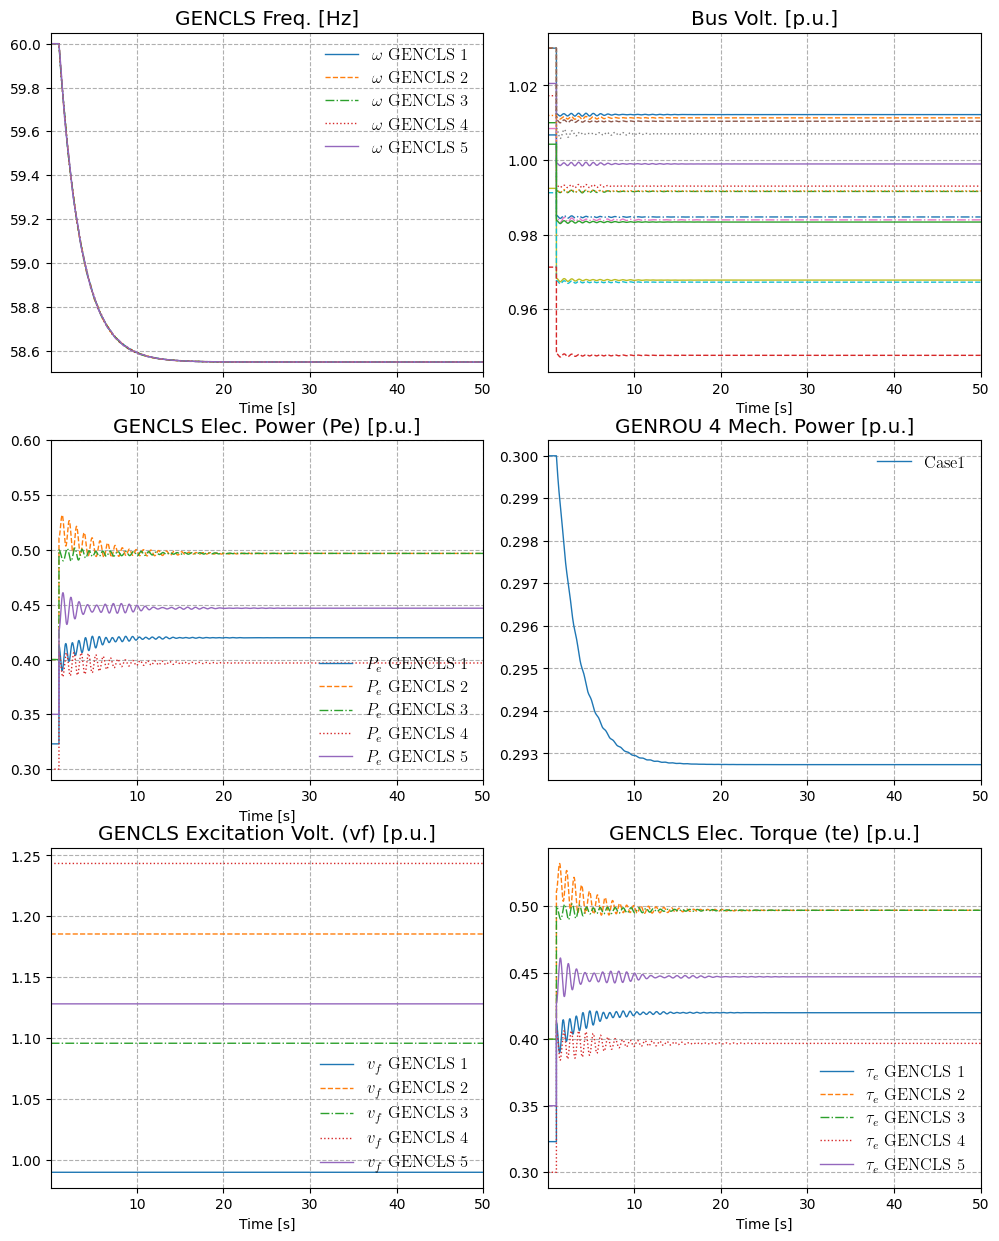

In [13]:
plt.style.use(['default'])
fig, ax = plt.subplots(3, 2, figsize=(12, 15))
plt.subplots_adjust(hspace=0.2, wspace=0.15)

fmin, fmax = 58.5, 60.05
pmin, pmax = 0.29, 0.6

_ = s1.TDS.plt.plot(s1.GENCLS.omega,
                    ytimes=s1.config.freq,
                    ymin=fmin, ymax=fmax,
                    grid=True, show=False,
                    fig=fig, ax=ax[0, 0],
                    title='GENCLS Freq. [Hz]')

_ = s1.TDS.plt.plot(s1.Bus.v,
                    grid=True, show=False,
                    fig=fig, ax=ax[0, 1],
                    title='Bus Volt. [p.u.]')

_ = s1.TDS.plt.plot(s1.GENCLS.Pe,
                    grid=True, show=False,
                    ymin=pmin, ymax=pmax,
                    fig=fig, ax=ax[1, 0],
                    title='GENCLS Elec. Power (Pe) [p.u.]')


w1 = s1.dae.ts.df_xy['omega GENCLS 4'].values
tm1 = s1.dae.ts.df_xy['tm GENCLS 4'].values
pm1 = w1 * tm1

_ = s1.TDS.plt.plot_data(s1.dae.ts.t, pm1,
                        #  ymin=pmin, ymax=pmax,
                         grid=True, show=False,
                         fig=fig, ax=ax[1, 1],
                         title='GENROU 4 Mech. Power [p.u.]',
                         yheader=['Case1'])

_ = s1.TDS.plt.plot(s1.GENCLS.vf,
                    grid=True, show=False,
                    fig=fig, ax=ax[2, 0],
                    title='GENCLS Excitation Volt. (vf) [p.u.]')

_ = s1.TDS.plt.plot(s1.GENCLS.te,
                    grid=True, show=False,
                    fig=fig, ax=ax[2, 1],
                    title='GENCLS Elec. Torque (te) [p.u.]')